In [110]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import sys
import argparse
import overpass


%matplotlib inline 

In [111]:
import json
json1_file = open('testFeatureMapping.json')
json1_str = json1_file.read()
mapping = json.loads(json1_str)
mapping

{'HEIGHT_DIF': {'target': 'displacement'},
 'LEVEL_DIFF': {'categoryMap': {'SETTLING': '2', 'UPLIFT': '1'},
  'target': 'TestTarget'}}

In [112]:
# Replace with inline add
observations = gpd.read_file('../data/SidewalkObservations/SidewalkObservations.shp')

In [113]:
testObs = observations.head(50)
testObs

,OBJECTID,SIDEWALK_U,OBSERV_TYP,OBSTRUCTIO,CLEARANCE_,TREE_UNITI,MINIMUM_WI,LEVEL_DIFF,UTILITY_OW,ISOLATED_C,FAILING_SH,SURFACE_CO,OTHER_FEAT,HEIGHT_DIF,GlobalID,geometry
0,1,SDW-44610,SURFCOND,,,,,,,,,CRACK>72,,,d01c130e-e5ff-4105-9e70-cd304fc1991d,POINT (-122.333868062383 47.55421346976489)
1,2,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,0.61,4dd58259-caab-4c0a-9e38-24463d6b2bed,POINT (-122.3335182104243 47.5542197502451)
2,3,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,1.33,5ca774c2-b8d7-4117-8823-fc4390800370,POINT (-122.3334340700717 47.55422600738782)
3,4,SDW-44610,HEIGHTDIFF,,,,,UPLIFT,,,,,,0.73,e0b5e922-07d7-4f04-91e1-e0989a35cc71,POINT (-122.3333873843994 47.55423323384112)
4,5,SDW-44610,HEIGHTDIFF,,,,,SETTLING,,,,,,1.7,6cf3980f-a5f1-487a-bb28-06de9b686f14,POINT (-122.3332620358998 47.55423716133004)
5,6,SDW-44610,HEIGHTDIFF,,,,,SETTLING,,,,,,1.67,204c556e-bfc0-4208-887a-31d8bcd1153c,POINT (-122.3331850213272 47.55421924623123)
6,7,SDW-44610,HEIGHTDIFF,,,,,UPLIFT,,,,,,1.58,4442d60f-bd98-441c-bd90-a336504af00c,POINT (-122.3328786415772 47.55421570762238)
7,8,SDW-44610,SURFCOND,,,,,,,,,CRACK>72,,,cd3f7a2e-3567-4e2f-845c-4a87c03a51d9,POINT (-122.3327845618073 47.55421829636418)
8,9,SDW-44610,HEIGHTDIFF,,,TRE-1067604,,UPLIFT,,,,,,0.73,3fcd909b-42d7-49de-ad8d-2eddcbe6ad8f,POINT (-122.3327406344837 47.55421456941395)
9,10,SDW-44610,HEIGHTDIFF,,,TRE-1067568,,UPLIFT,,,,,,1.1,a8eed6cb-1eeb-4219-8c74-256b4f150211,POINT (-122.3326809669988 47.55421427607193)


In [114]:
# Create a bounding box around the data

bounds = testObs.total_bounds
bounds

array([-122.33386806,   47.55404841, -122.32478686,   47.55423716])

In [137]:
# Create an overpass reference and get OSM 
# map_query(e , n, s, w)
# bounds -> minx, miny, maxx, maxy

api = overpass.API()
map_query = overpass.MapQuery(bounds[1], bounds[0], bounds[3], bounds[2])
response = api.Get(map_query)

In [138]:
response

{"features": [{"geometry": {"coordinates": [-122.3309183, 47.5541492], "type": "Point"}, "id": 53082208, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3254314, 47.5541215], "type": "Point"}, "id": 53082276, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3324104, 47.5541556], "type": "Point"}, "id": 53089317, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3295375, 47.5541352], "type": "Point"}, "id": 53089318, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3283522, 47.5541358], "type": "Point"}, "id": 53089320, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3269162, 47.5541266], "type": "Point"}, "id": 53089322, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.325265, 47.5541994], "type": "Point"}, "id": 2349883493, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [-122.3251705, 47.5542015], "type": "Point"}, "id": 2

In [139]:
# edit the geojson that overpass provides to include reference id in properties

features = response.features

for x in range(0, len(features)):
    features[x].properties['id'] = features[x].id
    features[x].pop('id', None)

In [140]:
features

[{"geometry": {"coordinates": [-122.3309183, 47.5541492], "type": "Point"}, "properties": {"id": 53082208}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3254314, 47.5541215], "type": "Point"}, "properties": {"id": 53082276}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3324104, 47.5541556], "type": "Point"}, "properties": {"id": 53089317}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3295375, 47.5541352], "type": "Point"}, "properties": {"id": 53089318}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3283522, 47.5541358], "type": "Point"}, "properties": {"id": 53089320}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3269162, 47.5541266], "type": "Point"}, "properties": {"id": 53089322}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.325265, 47.5541994], "type": "Point"}, "properties": {"id": 2349883493}, "type": "Feature"},
 {"geometry": {"coordinates": [-122.3251705, 47.5542015], "type": "Point"}, "properties": {"id": 234988

In [141]:
OSM = gpd.GeoDataFrame.from_features(response)

In [147]:
type(OSM.loc[24].highway)

str

In [150]:
lines = OSM[OSM['highway'] == 'residential']
lines.head()

,addr:city,addr:housenumber,addr:postcode,addr:street,building,geometry,highway,id,lanes,name,old_ref,source,tiger:cfcc,tiger:county,tiger:name_base,tiger:name_direction_prefix,tiger:name_direction_suffix,tiger:name_type
24,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.3309486 47.55868, -122.330927...",residential,6347542,NaN,3rd Avenue South,NaN,NaN,A41,"King, WA",3rd,NaN,S,Ave
25,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.3254393 47.5545673, -122.3254...",residential,6347567,NaN,Maynard Avenue South,NaN,NaN,A41,"King, WA",Maynard,NaN,S,Ave
26,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.3373453 47.5541514, -122.3370...",residential,6351218,NaN,South Brandon Street,NaN,NaN,A41,"King, WA",Brandon,S,NaN,St
27,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.3283623 47.5556615, -122.3283...",residential,6444882,NaN,5th Avenue South,NaN,NaN,A41,"King, WA",5th,NaN,S,Ave
35,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-122.3323844 47.5598049, -122.3323...",residential,245838593,NaN,2nd Avenue South,NaN,NaN,A41,"King, WA",2nd,NaN,S,Ave


In [121]:
OSM.head()

,addr:city,addr:housenumber,addr:postcode,addr:street,building,geometry,highway,id,lanes,name,old_ref,source,tiger:cfcc,tiger:county,tiger:name_base,tiger:name_direction_prefix,tiger:name_direction_suffix,tiger:name_type
0,NaN,NaN,NaN,NaN,NaN,POINT (-122.3309183 47.5541492),NaN,53082208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,POINT (-122.3254314 47.5541215),NaN,53082276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,POINT (-122.3324104 47.5541556),NaN,53089317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,POINT (-122.3295375 47.5541352),NaN,53089318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,POINT (-122.3283522 47.5541358),NaN,53089320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
OSM.keys()

Index(['addr:city', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'building', 'geometry', 'highway', 'id', 'lanes', 'name', 'old_ref',
       'source', 'tiger:cfcc', 'tiger:county', 'tiger:name_base',
       'tiger:name_direction_prefix', 'tiger:name_direction_suffix',
       'tiger:name_type'],
      dtype='object')

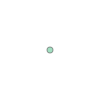

In [123]:
point = testObs.loc[1].geometry
point

In [72]:
testObs.loc[1]

OBJECTID                                                2
SIDEWALK_U                                      SDW-44610
OBSERV_TYP                                     HEIGHTDIFF
OBSTRUCTIO                                               
CLEARANCE_                                               
TREE_UNITI                                    TRE-1067558
MINIMUM_WI                                               
LEVEL_DIFF                                         UPLIFT
UTILITY_OW                                               
ISOLATED_C                                               
FAILING_SH                                               
SURFACE_CO                                               
OTHER_FEAT                                               
HEIGHT_DIF                                           0.61
GlobalID             4dd58259-caab-4c0a-9e38-24463d6b2bed
geometry      POINT (-122.3335182104243 47.5542197502451)
Name: 1, dtype: object

In [73]:
mylist = [x.object for x in lines.sindex.nearest(point.bounds, 10, objects=True)]

distances = lines.loc[mylist].distance(point)
distances

26    0.000053
32    0.000143
35    0.001108
33    0.001276
24    0.002601
31    0.002932
34    0.003342
30    0.003450
37    0.003981
28    0.004208
dtype: float64

In [74]:
nearestIndex = distances.idxmin()
nearestIndex

26

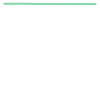

In [75]:

sidewalk_geom = lines.loc[nearestIndex].geometry
sidewalk_geom

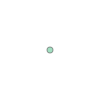

In [76]:
# Check shapely manual
distance_along = sidewalk_geom.project(point)
sidewalk_point = sidewalk_geom.interpolate(distance_along)
sidewalk_point

In [102]:
keys = testObs.loc[1].keys()
keys

Index(['OBJECTID', 'SIDEWALK_U', 'OBSERV_TYP', 'OBSTRUCTIO', 'CLEARANCE_',
       'TREE_UNITI', 'MINIMUM_WI', 'LEVEL_DIFF', 'UTILITY_OW', 'ISOLATED_C',
       'FAILING_SH', 'SURFACE_CO', 'OTHER_FEAT', 'HEIGHT_DIF', 'GlobalID',
       'geometry'],
      dtype='object')

In [107]:

#mappingDataframe = gpd.GeoDataFrame({'geometry': [sidewalk_point]})

mappingDict = {}
ref = 0

for key in keys:
    if key in mapping:
        if 'categoryMap' in mapping[key]:
            value = testObs.loc[1][key]
            mappedValue = mapping[key]["categoryMap"][value]
            mappingDict[mapping[key]["target"]] = [mappedValue]
        else:
            value = testObs.loc[1][key]
            mappingDict[mapping[key]["target"]] = [value]
            
        mappingDict['id'] = ref
        mappingDict['geometry'] = [sidewalk_point]
        ref = ref - 1
        #tempFrame = pd.DataFrame.from_dict(mappingDict)
        #gpd.GeoDataFrame(mappingDict)   
    
print(mappingDict)

{'TestTarget': ['1'], 'id': -1, 'geometry': [<shapely.geometry.point.Point object at 0x12c9717f0>], 'displacement': ['0.61']}


In [108]:
gpd.GeoDataFrame(mappingDict)

,TestTarget,displacement,geometry,id
0,1,0.61,POINT (-122.333518728589 47.55416635572517),-1


In [131]:
testDataFrame = gpd.GeoDataFrame()

gpd.GeoDataFrame(pd.concat([testDataFrame, 
                            gpd.GeoDataFrame(mappingDict)
                            ], ignore_index=True))

,TestTarget,displacement,geometry,id
0,1,0.61,POINT (-122.333518728589 47.55416635572517),-1


In [96]:
gpd.GeoDataFrame(testDataFrame)

,addr:city,addr:housenumber,addr:postcode,addr:street,building,geometry,highway,id,lanes,name,old_ref,source,tiger:cfcc,tiger:county,tiger:name_base,tiger:name_direction_prefix,tiger:name_direction_suffix,tiger:name_type
1,NaN,NaN,NaN,NaN,NaN,POINT (-122.3254314 47.5541215),NaN,53082276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
gpd.GeoDataFrame({'geometry': [sidewalk_point], 'hello' : 'world'})

,geometry,hello
0,POINT (-122.333518728589 47.55416635572517),world
